<a href="https://colab.research.google.com/github/harsha-9977/AIML/blob/main/26_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plot 3D

In [1]:
import numpy as np

In [2]:
x = np.linspace(-1,5,200)
y = np.linspace(-1,5,200)

In [3]:
z1 = 2*x + 5*y - 3

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

def plot_3d_surface(z_func, x_range=(-10, 10), y_range=(-10, 10), resolution=200,
                    title='3D Surface Plot', elev=30, azim=45):
    """
    Plots a 3D surface using matplotlib.

    Parameters:
    - z_func: function of two variables (x, y), e.g. lambda x, y: 2*x + 5*y - 3
    - x_range: (min, max) tuple for x-axis
    - y_range: (min, max) tuple for y-axis
    - resolution: number of points per axis
    - title: title of the plot
    - elev: elevation angle (vertical)
    - azim: azimuth angle (horizontal rotation)
    """
    x = np.linspace(*x_range, resolution)
    y = np.linspace(*y_range, resolution)
    X, Y = np.meshgrid(x, y)
    Z = z_func(X, Y)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title(title)

    # Set view angle
    ax.view_init(elev=elev, azim=azim)

    # Add color bar
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.show()


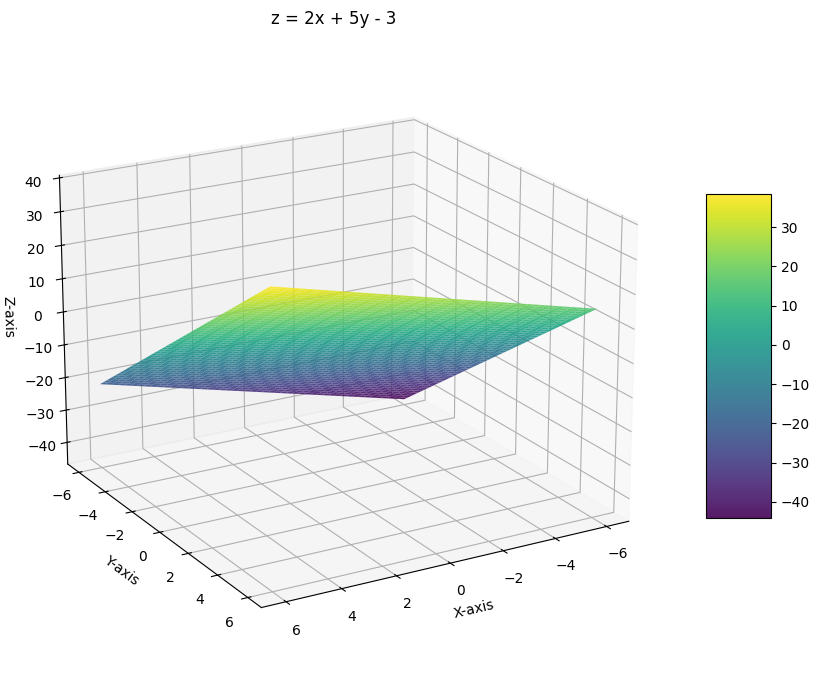

In [24]:
plot_3d_surface(lambda x, y: 2*x + 5*y - 3, title='z = 2x + 5y - 3', elev=20, azim=60)

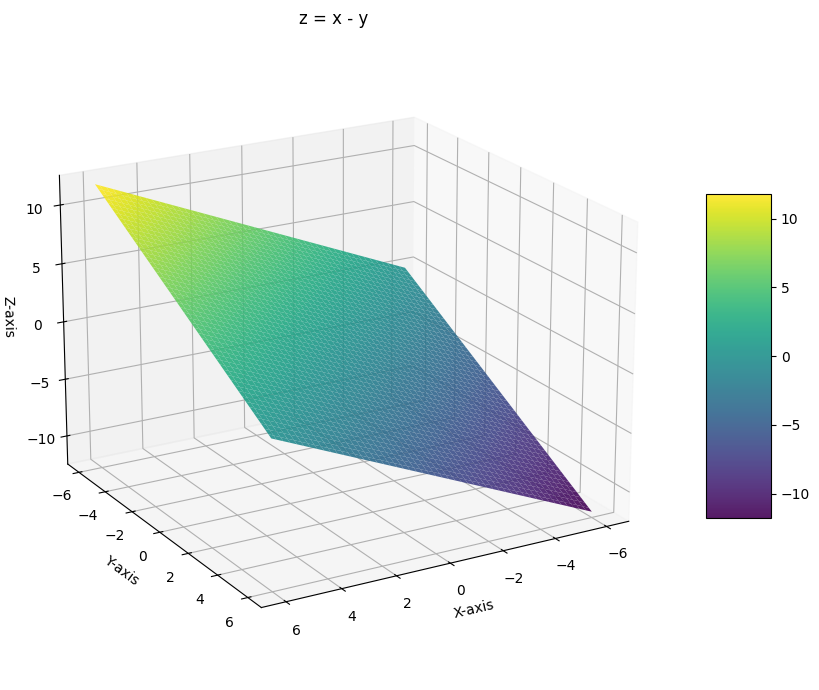

In [25]:
plot_3d_surface(lambda x, y: x - y, title='z = x - y',  elev=20, azim=60)

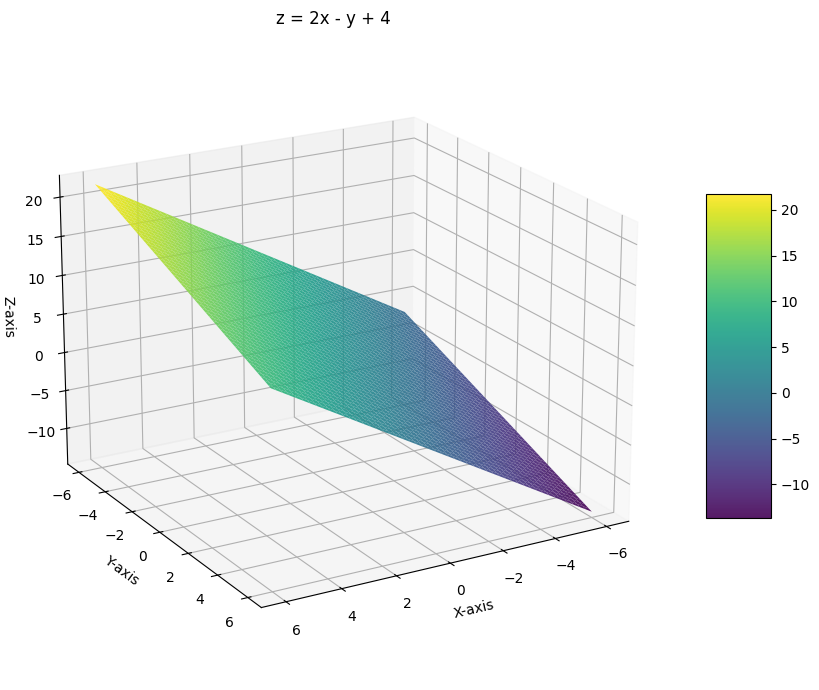

In [26]:
plot_3d_surface(lambda x, y: 2*x - y + 4, title='z = 2x - y + 4',  elev=20, azim=60)

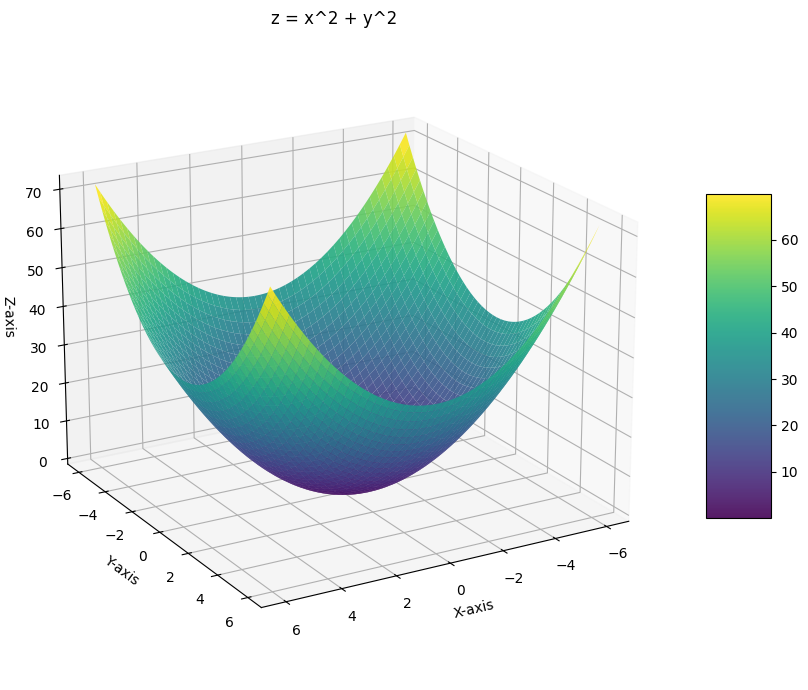

In [78]:
plot_3d_surface(lambda x, y: x**2 + y**2, title='z = x^2 + y^2',  elev=20, azim=60)

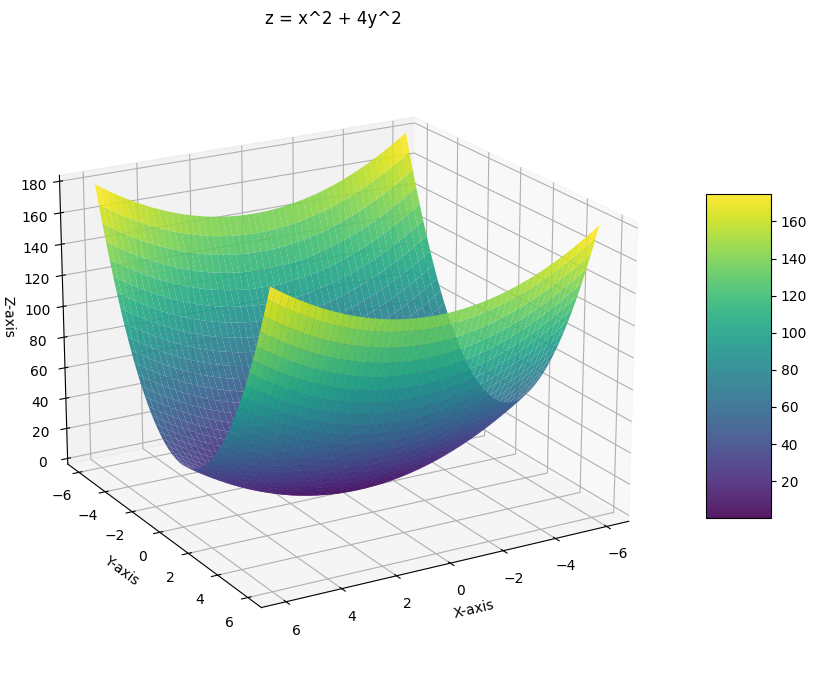

In [77]:
plot_3d_surface(lambda x, y: x**2 + 4*y**2, title='z = x^2 + 4y^2',  elev=20, azim=60)

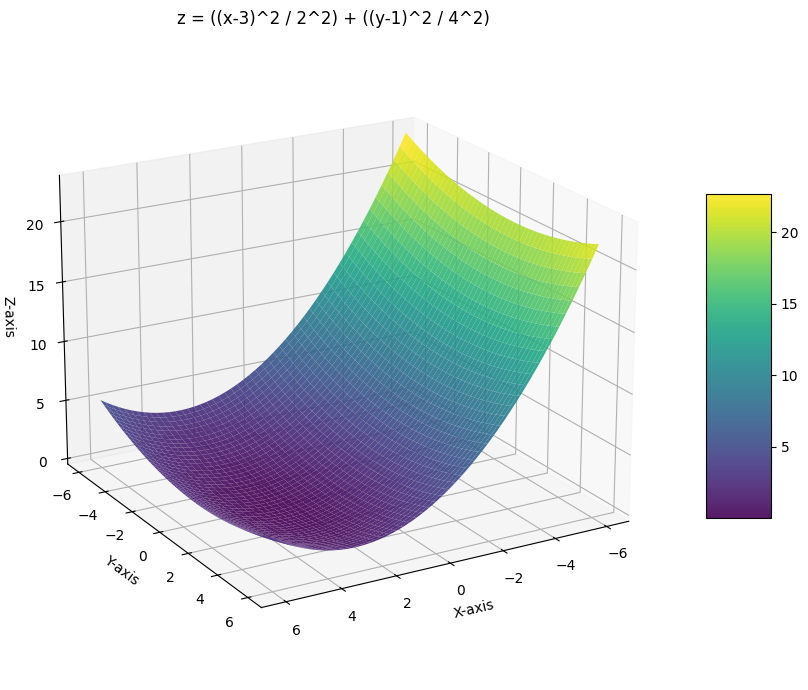

In [76]:
plot_3d_surface(lambda x, y: ((x-3)**2 / 2**2) + ((y-1)**2 / 4**2), title='z = ((x-3)^2 / 2^2) + ((y-1)^2 / 4^2)',  elev=20, azim=60)

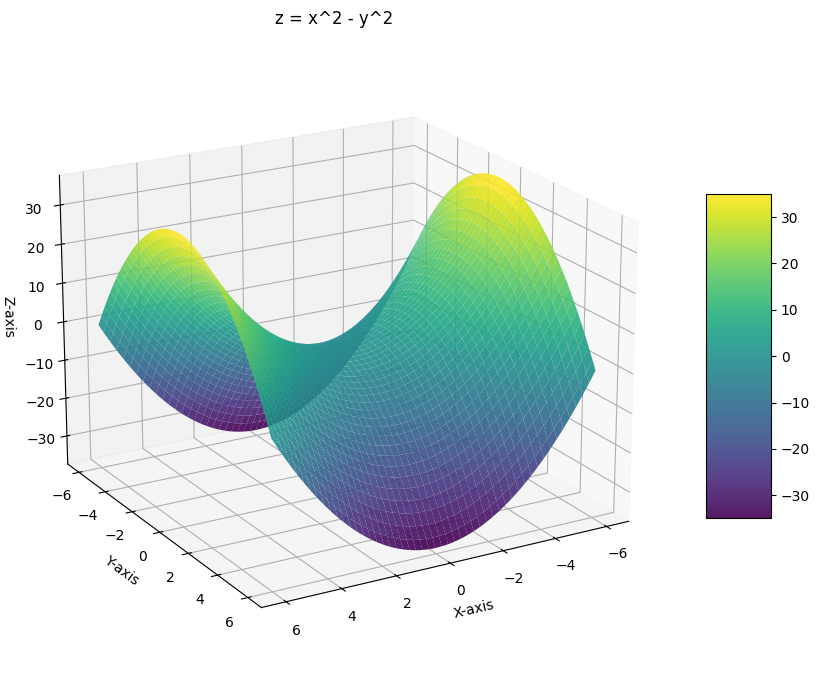

In [35]:
plot_3d_surface(lambda x, y: x**2 - y**2, title='z = x^2 - y^2',  elev=20, azim=60)

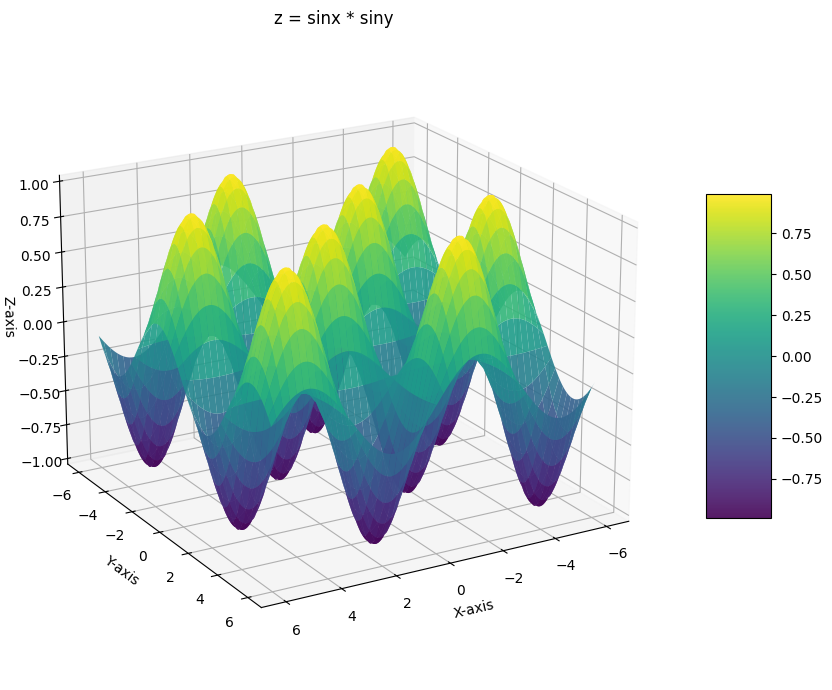

In [75]:
plot_3d_surface(lambda x, y: np.sin(x) * np.sin(y), title='z = sinx * siny',  elev=20, azim=60)

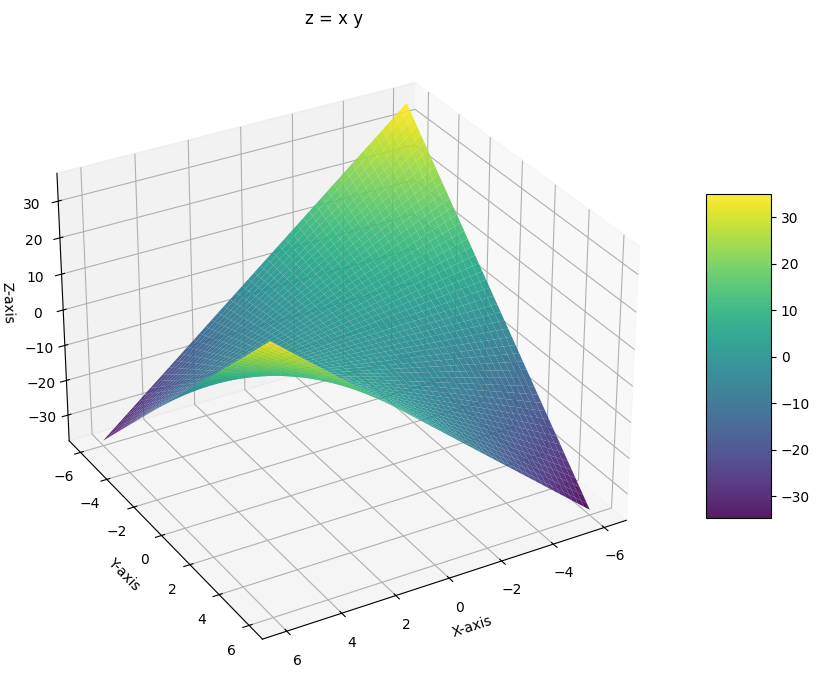

In [74]:
plot_3d_surface(lambda x, y: x * y, title='z = xy',  elev=30, azim=60)

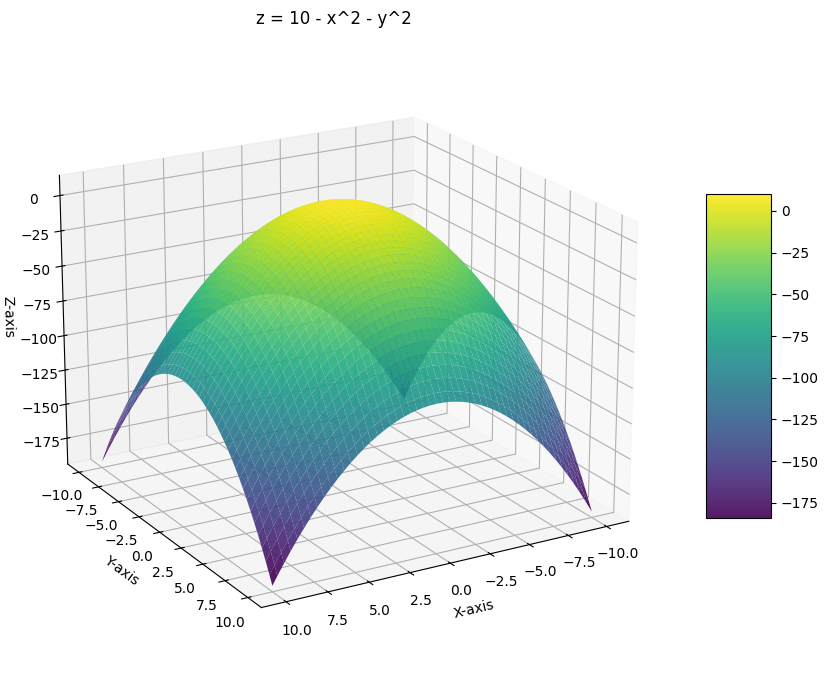

In [80]:
plot_3d_surface(lambda x, y: 10 - x**2 - y**2, title='z = 10 - x^2 - y^2',  elev=20, azim=60)

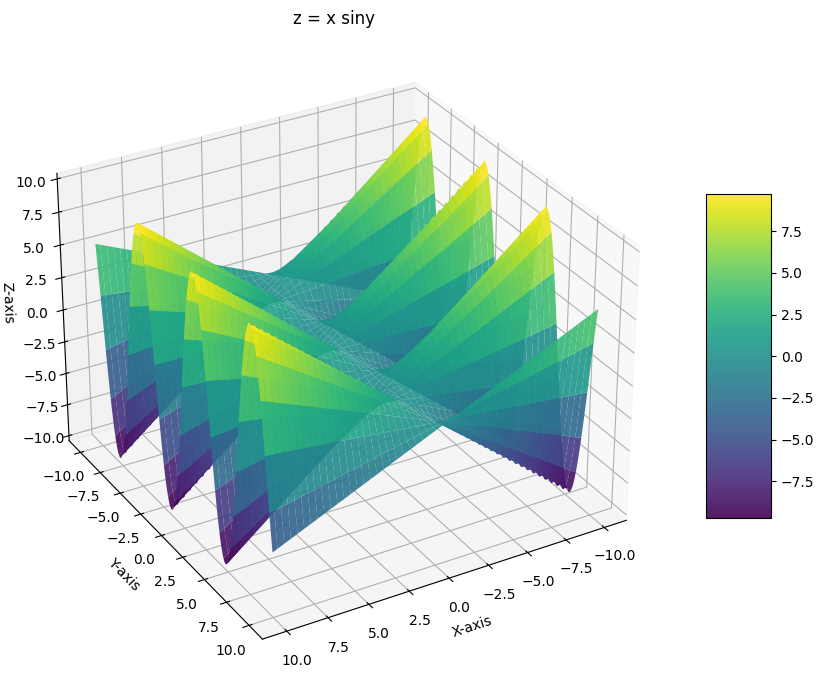

In [81]:
plot_3d_surface(lambda x, y: x * np.sin(y), title='z = x siny',  elev=30, azim=60)

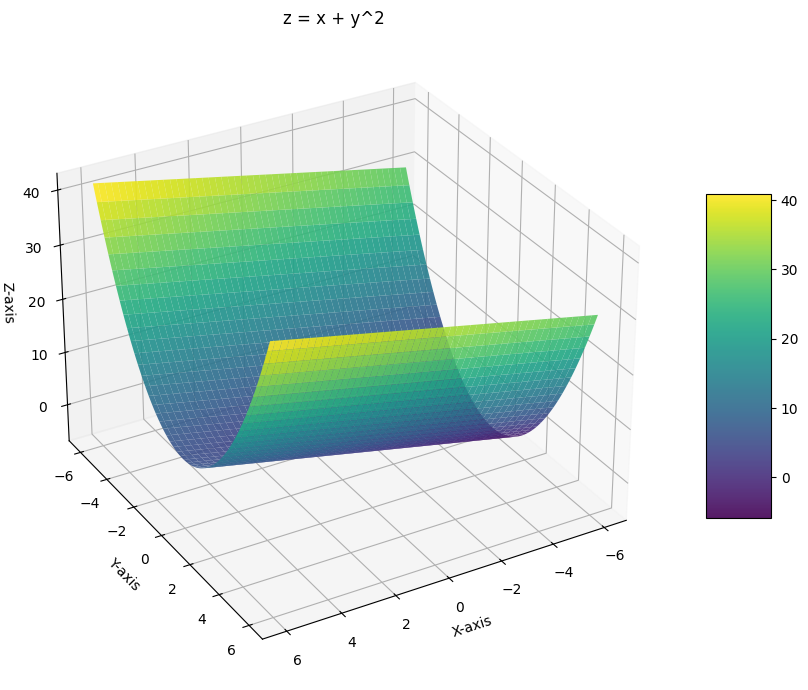

In [63]:
plot_3d_surface(lambda x, y: x + y**2, title='z = x + y^2',  elev=30, azim=60)

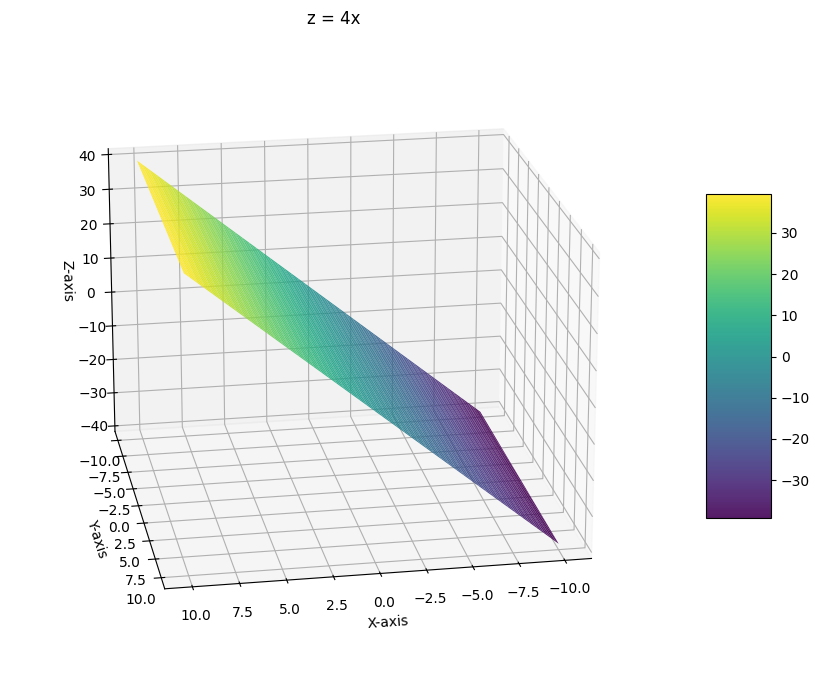

In [85]:
plot_3d_surface(lambda x, y: 4 * x , title='z = 4x',  elev=20, azim=80)

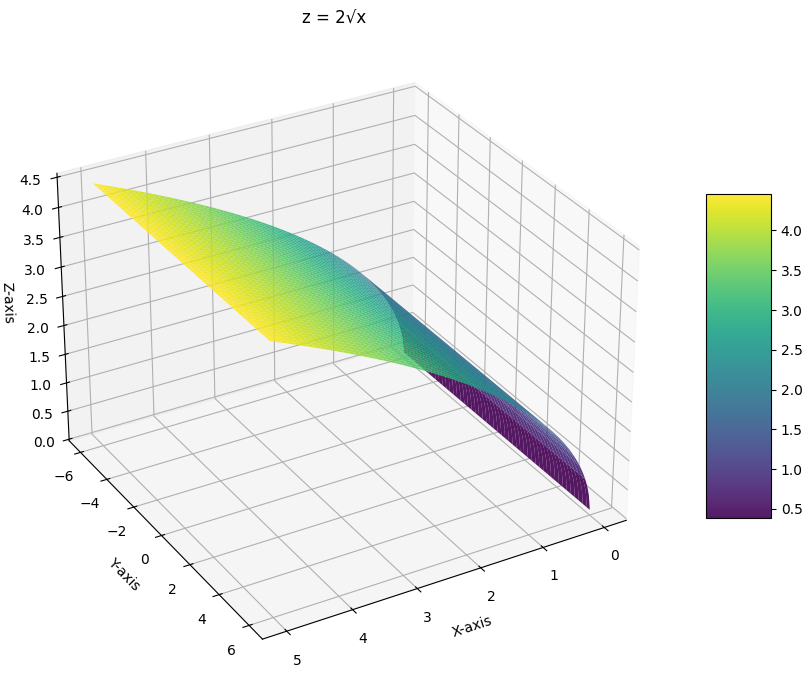

In [73]:
plot_3d_surface(lambda x, y: 2 * np.sqrt(x), title='z = 2√x', elev=30, azim=60, x_range=(0.001, 5))

In [107]:
import pandas as pd
dfs = {
    'weight' : [3.4,3.2,3.1,3.0,3.4,3.2,3.8,2.9,2.8],
    'gender' : [0,0,1,1,0,1,0,1,0]
}
df = pd.DataFrame(dfs)
df

weight  gender
0     3.4       0
1     3.2       0
2     3.1       1
3     3.0       1
4     3.4       0
5     3.2       1
6     3.8       0
7     2.9       1
8     2.8       0

In [108]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [124]:
m = 0.8
c = -3

df['z'] = df['weight'] * m + c

In [116]:
df['predicted_gender'] = sigmoid(df['z'])

In [117]:
df['predicted_class'] = (df['predicted_gender'] >= 0.5).astype(int)


In [118]:
df

weight  gender     z  predicted_gender  predicted_class
0     3.4       0 -0.28          0.430454                0
1     3.2       0 -0.44          0.391741                0
2     3.1       1 -0.52          0.372852                0
3     3.0       1 -0.60          0.354344                0
4     3.4       0 -0.28          0.430454                0
5     3.2       1 -0.44          0.391741                0
6     3.8       0  0.04          0.509999                1
7     2.9       1 -0.68          0.336261                0
8     2.8       0 -0.76          0.318646                0

In [119]:
accuracy = (df['predicted_class'] == df['gender']).mean()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 44.44%


In [121]:
tp = ((df['predicted_class'] == 1) & (df['gender'] == 1)).sum()
fp = ((df['predicted_class'] == 1) & (df['gender'] == 0)).sum()

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
print(f"Precision: {precision:.2%}")

Precision: 0.00%


In [122]:
# True Positives (already defined)
tp = ((df['predicted_class'] == 1) & (df['gender'] == 1)).sum()

# False Negatives
fn = ((df['predicted_class'] == 0) & (df['gender'] == 1)).sum()

# Recall calculation
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
print(f"Recall: {recall:.2%}")

Recall: 0.00%


In [125]:
# 2nd model
import pandas as pd
dfs = {
    'weight' : [3.4,3.2,3.1,3.0,3.4,3.2,3.8,2.9,2.8],
    'gender' : [0,0,1,1,0,1,0,1,0]
}
df = pd.DataFrame(dfs)
df

weight  gender
0     3.4       0
1     3.2       0
2     3.1       1
3     3.0       1
4     3.4       0
5     3.2       1
6     3.8       0
7     2.9       1
8     2.8       0

In [126]:
m = -1
c = 3

df['z'] = df['weight'] * m + c

In [127]:
df['predicted_gender'] = sigmoid(df['z'])

In [128]:
df['predicted_class'] = (df['predicted_gender'] >= 0.5).astype(int)


In [129]:
df

weight  gender    z  predicted_gender  predicted_class
0     3.4       0 -0.4          0.401312                0
1     3.2       0 -0.2          0.450166                0
2     3.1       1 -0.1          0.475021                0
3     3.0       1  0.0          0.500000                1
4     3.4       0 -0.4          0.401312                0
5     3.2       1 -0.2          0.450166                0
6     3.8       0 -0.8          0.310026                0
7     2.9       1  0.1          0.524979                1
8     2.8       0  0.2          0.549834                1

In [130]:
accuracy = (df['predicted_class'] == df['gender']).mean()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 66.67%


In [131]:
tp = ((df['predicted_class'] == 1) & (df['gender'] == 1)).sum()
fp = ((df['predicted_class'] == 1) & (df['gender'] == 0)).sum()

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
print(f"Precision: {precision:.2%}")

Precision: 66.67%


In [132]:
# True Positives (already defined)
tp = ((df['predicted_class'] == 1) & (df['gender'] == 1)).sum()

# False Negatives
fn = ((df['predicted_class'] == 0) & (df['gender'] == 1)).sum()

# Recall calculation
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
print(f"Recall: {recall:.2%}")

Recall: 50.00%


In [134]:
import pandas as pd
import numpy as np

# Step 1: Data
dfs = {
    'weight': [3.4, 3.2, 3.1, 3.0, 3.4, 3.2, 3.8, 2.9, 2.8],
    'gender': [1, 1, 0, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(dfs)

# Step 2: Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Model Parameters (manually set for now)
w = -1
b = 3

# Step 4: Prediction
df['z'] = df['weight'] * w + b
df['prediction'] = sigmoid(df['z'])

# Step 5: Thresholding to get predicted class (0 or 1)
df['predicted_class'] = (df['prediction'] >= 0.5).astype(int)

# Step 6: Metrics

# Accuracy
accuracy = (df['predicted_class'] == df['gender']).mean()

# Confusion matrix values
tp = ((df['predicted_class'] == 1) & (df['gender'] == 1)).sum()
fp = ((df['predicted_class'] == 1) & (df['gender'] == 0)).sum()
fn = ((df['predicted_class'] == 0) & (df['gender'] == 1)).sum()

# Precision, Recall, F1
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall    = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score  = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Step 7: Print Results
print(df[['weight', 'z', 'prediction', 'predicted_class', 'gender']])
print("\n🔍 Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall   : {recall:.2%}")
print(f"F1 Score : {f1_score:.2%}")


   weight    z  prediction  predicted_class  gender
0     3.4 -0.4    0.401312                0       1
1     3.2 -0.2    0.450166                0       1
2     3.1 -0.1    0.475021                0       0
3     3.0  0.0    0.500000                1       0
4     3.4 -0.4    0.401312                0       1
5     3.2 -0.2    0.450166                0       0
6     3.8 -0.8    0.310026                0       1
7     2.9  0.1    0.524979                1       0
8     2.8  0.2    0.549834                1       1

🔍 Evaluation Metrics:
Accuracy : 33.33%
Precision: 33.33%
Recall   : 20.00%
F1 Score : 25.00%


In [135]:
import pandas as pd
import numpy as np

# Step 1: Data
dfs = {
    'weight': [3.4, 3.2, 3.1, 3.0, 3.4, 3.2, 3.8, 2.9, 2.8],
    'gender': [0, 0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(dfs)

# Step 2: Tanh Activation Function (scaled to 0–1)
def tanh_scaled(z):
    return (np.tanh(z) + 1) / 2

# Step 3: Model Parameters
w = -1
b = 3

# Step 4: Prediction
df['z'] = df['weight'] * w + b
df['prediction'] = tanh_scaled(df['z'])

# Step 5: Thresholding
df['predicted_class'] = (df['prediction'] >= 0.5).astype(int)

# Step 6: Metrics
tp = ((df['predicted_class'] == 1) & (df['gender'] == 1)).sum()
fp = ((df['predicted_class'] == 1) & (df['gender'] == 0)).sum()
fn = ((df['predicted_class'] == 0) & (df['gender'] == 1)).sum()

accuracy = (df['predicted_class'] == df['gender']).mean()
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Step 7: Output
print(df[['weight', 'z', 'prediction', 'predicted_class', 'gender']])
print("\n🔍 Evaluation Metrics (using tanh):")
print(f"Accuracy : {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall   : {recall:.2%}")
print(f"F1 Score : {f1_score:.2%}")


   weight    z  prediction  predicted_class  gender
0     3.4 -0.4    0.310026                0       0
1     3.2 -0.2    0.401312                0       0
2     3.1 -0.1    0.450166                0       1
3     3.0  0.0    0.500000                1       1
4     3.4 -0.4    0.310026                0       0
5     3.2 -0.2    0.401312                0       1
6     3.8 -0.8    0.167982                0       0
7     2.9  0.1    0.549834                1       1
8     2.8  0.2    0.598688                1       0

🔍 Evaluation Metrics (using tanh):
Accuracy : 66.67%
Precision: 66.67%
Recall   : 50.00%
F1 Score : 57.14%


In [136]:
import pandas as pd
import numpy as np

# Step 1: Data
dfs = {
    'weight': [3.4, 3.2, 3.1, 3.0, 3.4, 3.2, 3.8, 2.9, 2.8],
    'gender': [0, 0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(dfs)

# Step 2: Raw tanh function
def tanh_raw(z):
    return np.tanh(z)

# Step 3: Model parameters
w = -4.5
b = 14

# Step 4: Prediction
df['z'] = df['weight'] * w + b
df['prediction'] = tanh_raw(df['z'])

# Step 5: Classification using threshold at 0
df['predicted_class'] = (df['prediction'] >= 0).astype(int)

# Step 6: Evaluation metrics
tp = ((df['predicted_class'] == 1) & (df['gender'] == 1)).sum()
fp = ((df['predicted_class'] == 1) & (df['gender'] == 0)).sum()
fn = ((df['predicted_class'] == 0) & (df['gender'] == 1)).sum()

accuracy = (df['predicted_class'] == df['gender']).mean()
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Step 7: Output
print(df[['weight', 'z', 'prediction', 'predicted_class', 'gender']])
print("\n🔍 Evaluation Metrics (using raw tanh):")
print(f"Accuracy : {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall   : {recall:.2%}")
print(f"F1 Score : {f1_score:.2%}")


   weight     z  prediction  predicted_class  gender
0     3.4 -1.30   -0.861723                0       0
1     3.2 -0.40   -0.379949                0       0
2     3.1  0.05    0.049958                1       1
3     3.0  0.50    0.462117                1       1
4     3.4 -1.30   -0.861723                0       0
5     3.2 -0.40   -0.379949                0       1
6     3.8 -3.10   -0.995949                0       0
7     2.9  0.95    0.739783                1       1
8     2.8  1.40    0.885352                1       0

🔍 Evaluation Metrics (using raw tanh):
Accuracy : 77.78%
Precision: 75.00%
Recall   : 75.00%
F1 Score : 75.00%


In [138]:
import pandas as pd
import numpy as np

# Step 1: Data
dfs = {
    'weight': [3.4, 3.2, 3.1, 3.0, 3.4, 3.2, 3.8, 2.9, 2.8],
    'gender': [0, 0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(dfs)

# Step 2: Manual tanh function using formula
def tanh_manual(z):
    ez = np.exp(z)
    emz = np.exp(-z)
    return (ez - emz) / (ez + emz)

# Step 3: Model parameters
w = -0.5
b = 2.8

# Step 4: Prediction
df['z'] = df['weight'] * w + b
df['prediction'] = df['z'].apply(tanh_manual)

# Step 5: Classify: 1 if tanh(z) >= 0 else 0
df['predicted_class'] = (df['prediction'] >= 0).astype(int)

# Step 6: Evaluation metrics
tp = ((df['predicted_class'] == 1) & (df['gender'] == 1)).sum()
fp = ((df['predicted_class'] == 1) & (df['gender'] == 0)).sum()
fn = ((df['predicted_class'] == 0) & (df['gender'] == 1)).sum()

accuracy = (df['predicted_class'] == df['gender']).mean()
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Step 7: Output
print(df[['weight', 'z', 'prediction', 'predicted_class', 'gender']])
print("\n🔍 Evaluation Metrics (using manual tanh):")
print(f"Accuracy : {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall   : {recall:.2%}")
print(f"F1 Score : {f1_score:.2%}")


   weight     z  prediction  predicted_class  gender
0     3.4  1.10    0.800499                1       0
1     3.2  1.20    0.833655                1       0
2     3.1  1.25    0.848284                1       1
3     3.0  1.30    0.861723                1       1
4     3.4  1.10    0.800499                1       0
5     3.2  1.20    0.833655                1       1
6     3.8  0.90    0.716298                1       0
7     2.9  1.35    0.874053                1       1
8     2.8  1.40    0.885352                1       0

🔍 Evaluation Metrics (using manual tanh):
Accuracy : 44.44%
Precision: 44.44%
Recall   : 100.00%
F1 Score : 61.54%


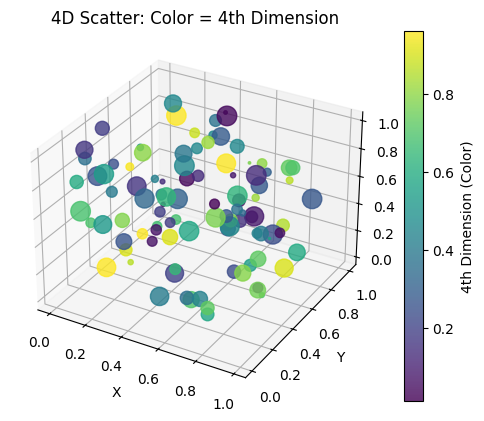

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# 4D Data
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
c = np.random.rand(100)  # 4th dimension: color
s = np.random.rand(100) * 200  # Optional: size

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=c, s=s, cmap='viridis', alpha=0.8)
plt.colorbar(sc, label="4th Dimension (Color)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("4D Scatter: Color = 4th Dimension")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


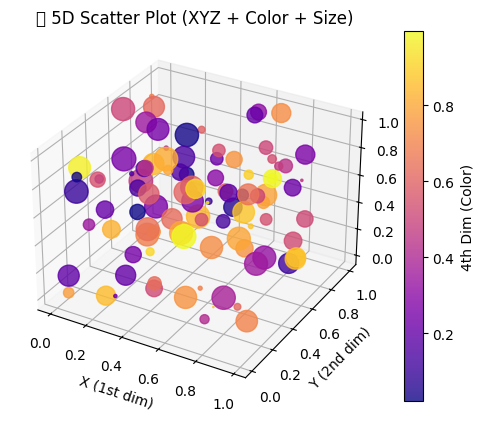

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random 5D data
np.random.seed(1)
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
color = np.random.rand(100)       # 4th dim: color
size = np.random.rand(100) * 300  # 5th dim: size

# Plot 3D scatter with color + size
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=color, s=size, cmap='plasma', alpha=0.8)

ax.set_xlabel('X (1st dim)')
ax.set_ylabel('Y (2nd dim)')
ax.set_zlabel('Z (3rd dim)')
plt.title("🔷 5D Scatter Plot (XYZ + Color + Size)")
plt.colorbar(sc, label='4th Dim (Color)')
plt.show()
